In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# reading data
df=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
df.columns # checking column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
pd.set_option('display.max_columns',None)
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df=df.drop('customerID',axis=1) # removing customer id

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().values.sum() # checking null values

In [7]:
df.duplicated().values.sum() # checking duplicates

np.int64(22)

In [8]:
df=df.drop_duplicates() # droping duplicates

In [9]:
df.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [10]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_data=[]
# seperating categorical datas
for i in df.columns:
    if df[i].dtype=='O':
        categorical_data.append(i)
print(categorical_data)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [11]:
# Label encoding
for i in categorical_data:
    df.loc[:,i]=le.fit_transform(df.loc[:,i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [12]:
df.info() # Checking datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [13]:
# changing data types to integer from object
df[categorical_data]=df[categorical_data].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  
 17  

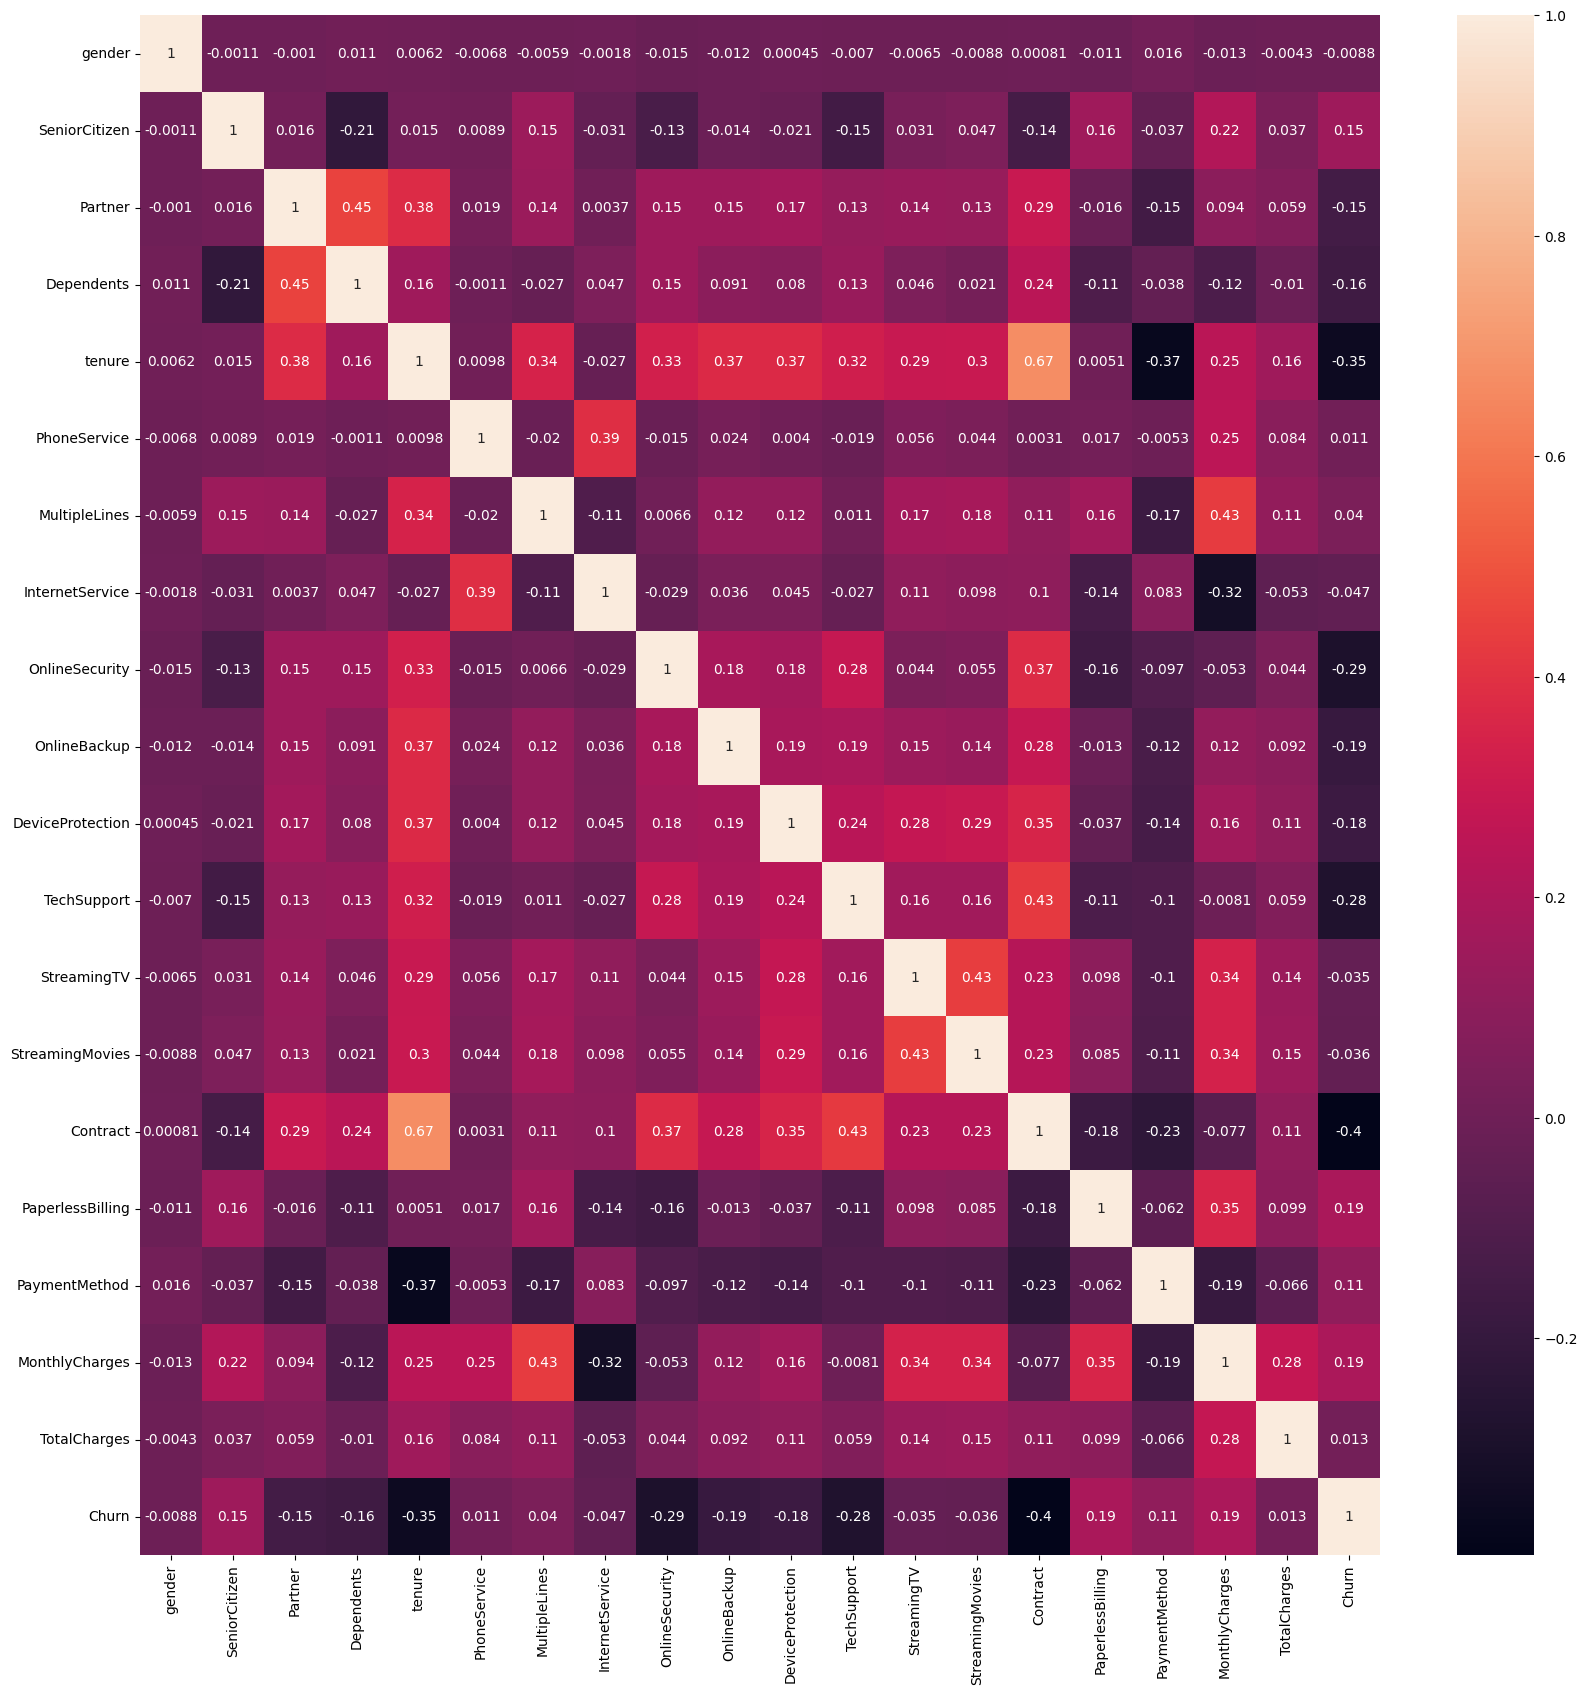

In [15]:
# plotting heatmap to see correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

### as we can see from above heat map, relation between gender and churn is almost 0 so removing gender

In [16]:
df=df.drop('gender',axis=1)

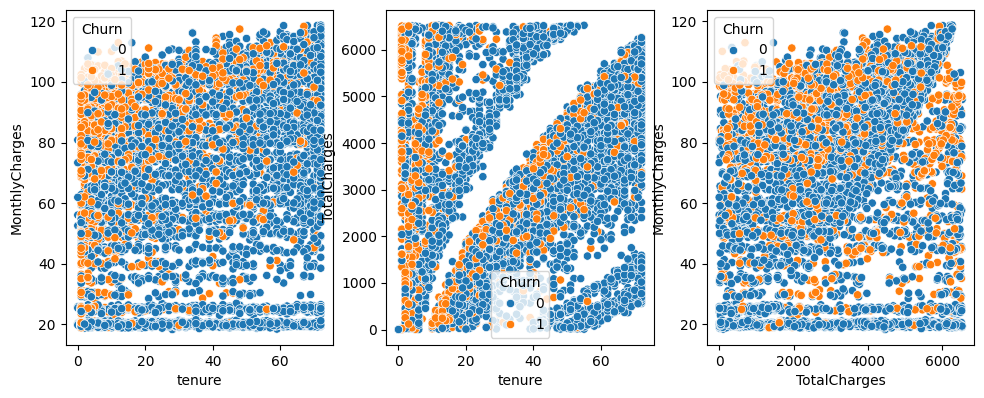

In [17]:
# plotting scatter plot betwen numerical labels to see data scatter
plt.figure(figsize=(20,20))
plt.subplot(4,5,1)
sns.scatterplot(x='tenure',y='MonthlyCharges',data=df,hue='Churn')
plt.subplot(4,5,2)
sns.scatterplot(x='tenure',y='TotalCharges',data=df,hue='Churn')
plt.subplot(4,5,3)
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

In [18]:
categorical_data.remove('gender')
categorical_data

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

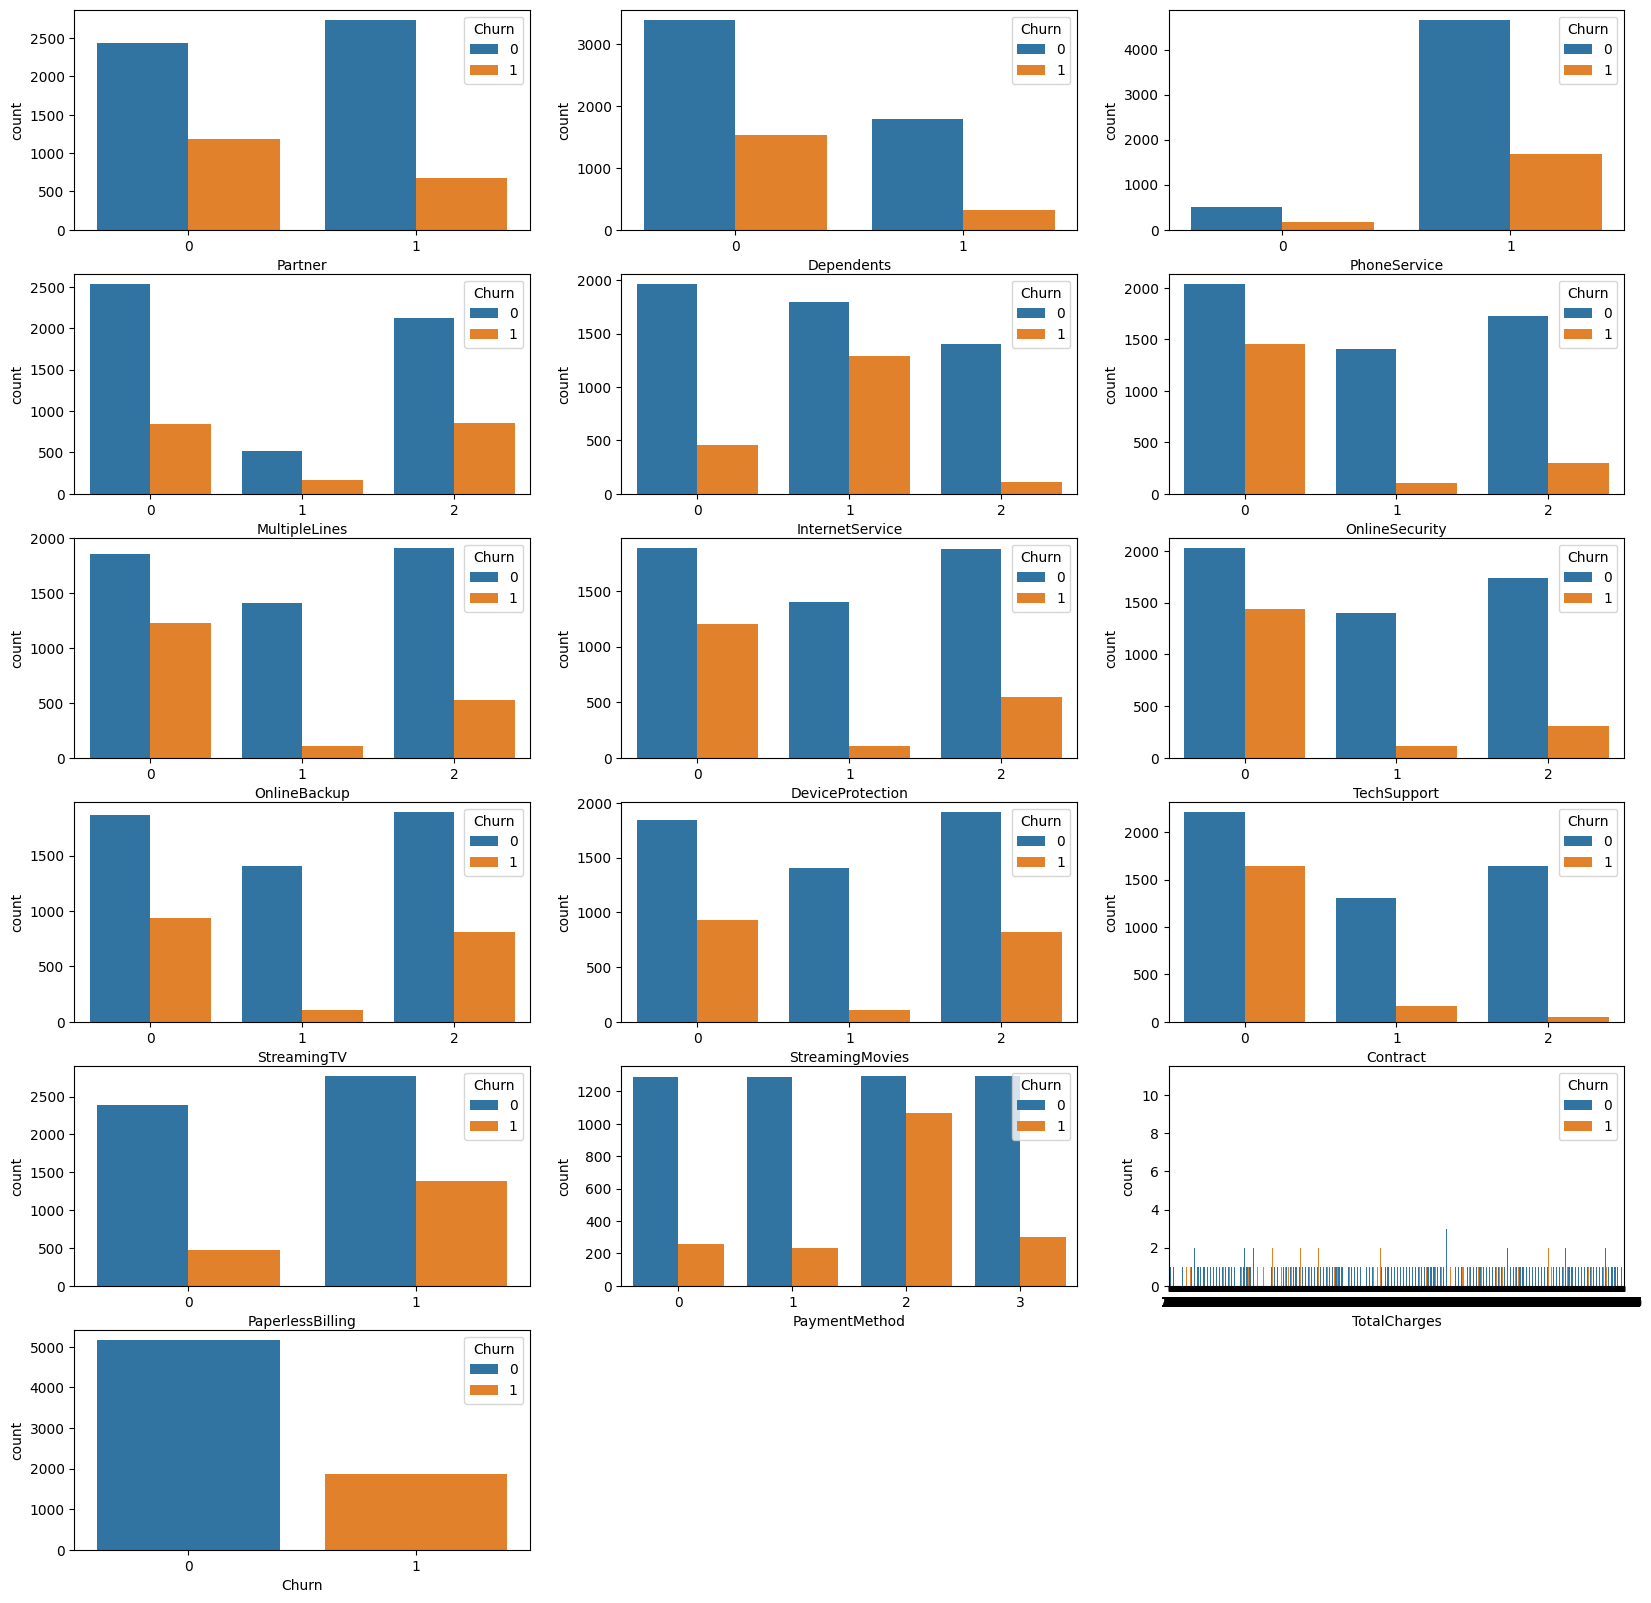

In [19]:
plt.figure(figsize=(20,20))
j=1
for i in categorical_data:
    plt.subplot(6,3,j)
    sns.countplot(x=df[i],hue=df['Churn'])
    j+=1
plt.show()

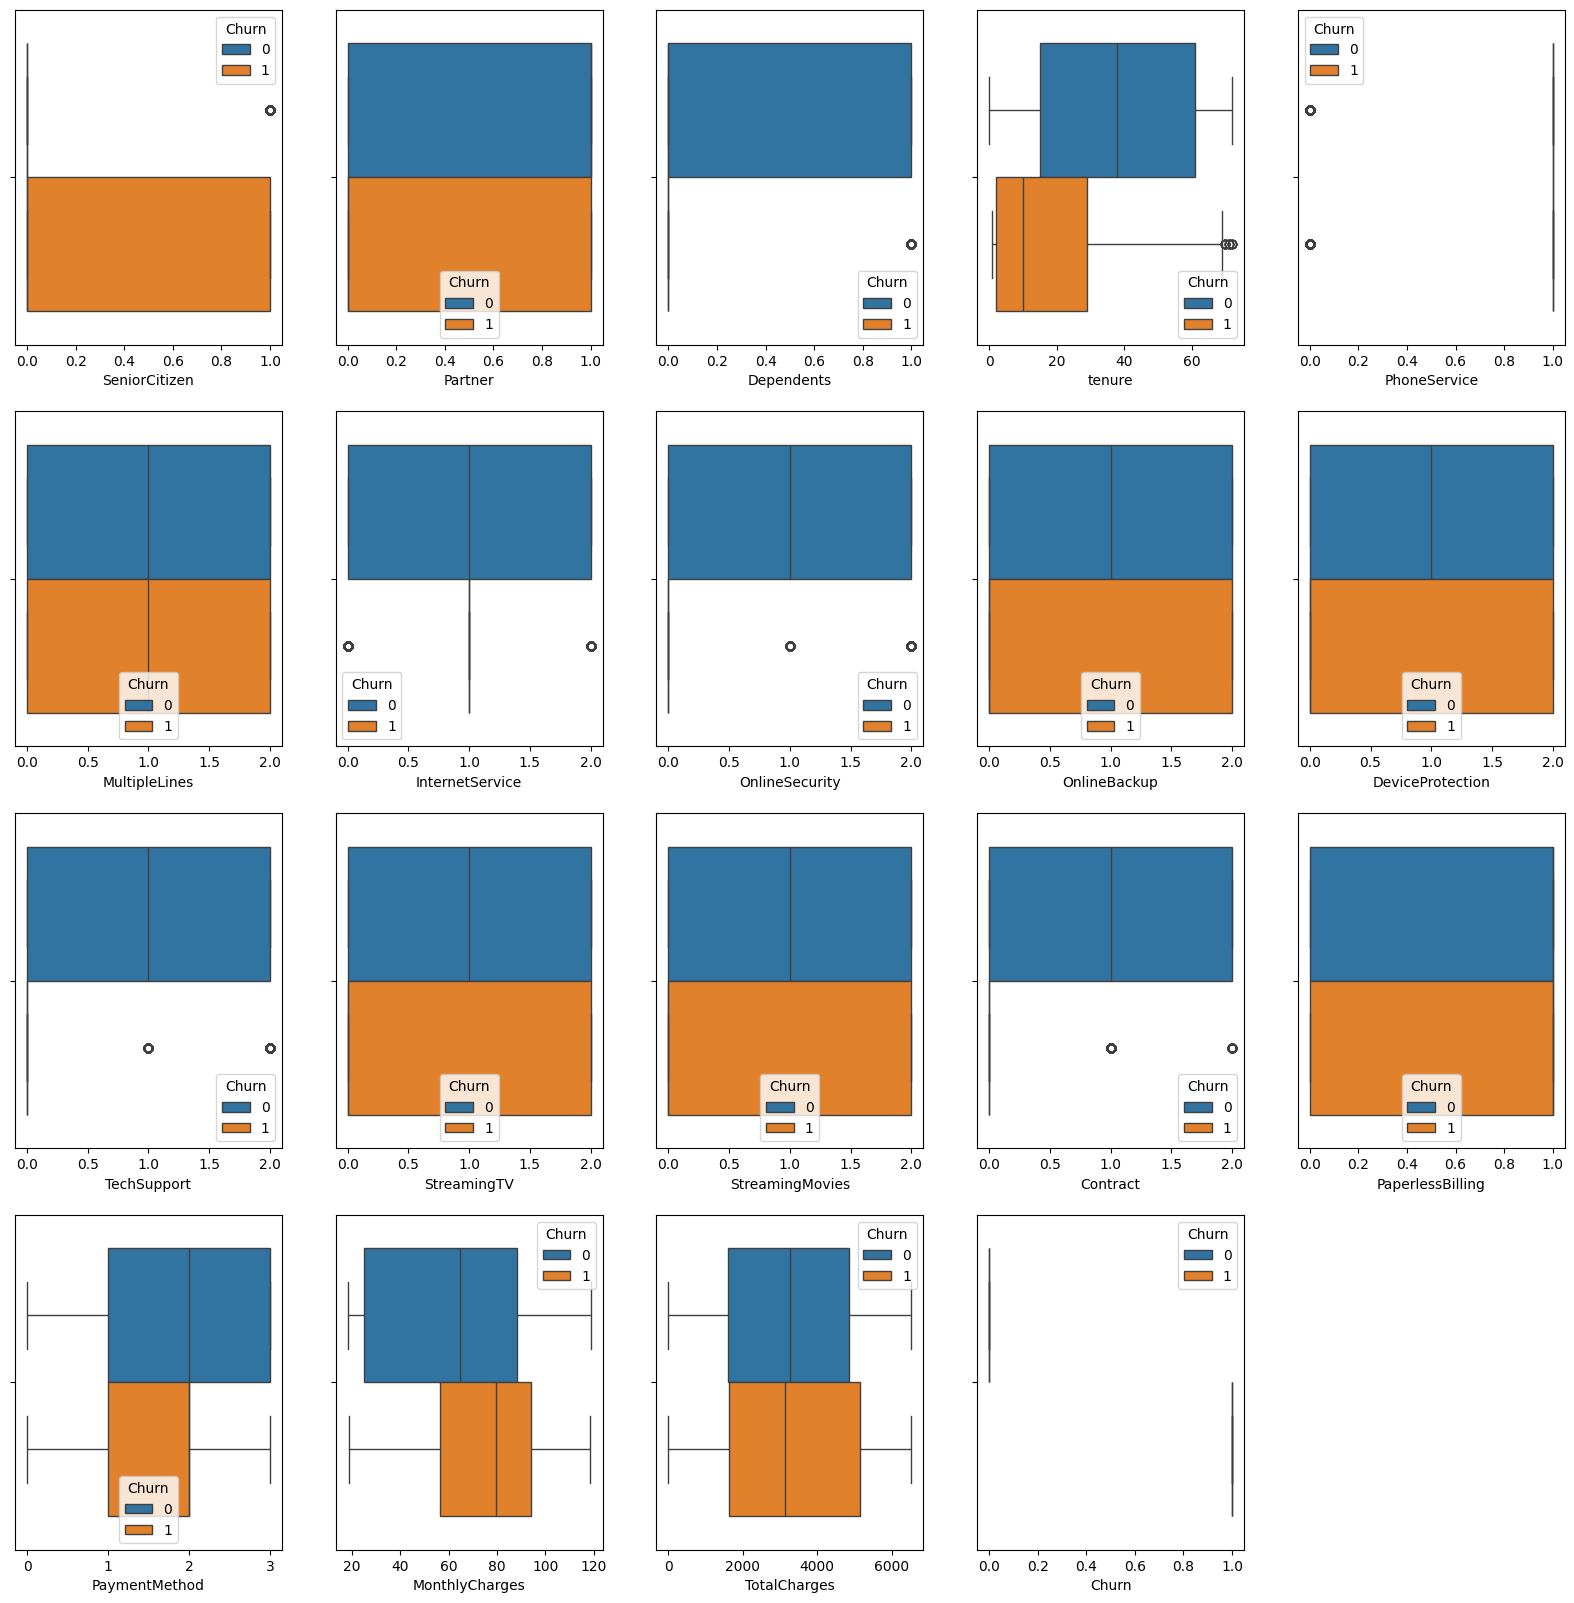

In [20]:
j=1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(4,5,j)
    sns.boxplot(x=df[i],hue=df['Churn'])
    j+=1
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape

(5616, 18)

In [23]:
scaled=StandardScaler()
scaled_train_x=scaled.fit_transform(x_train)
scaled_test_x=scaled.transform(x_test)

In [24]:
# Importing models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
model_dict={
    'dt':DecisionTreeClassifier(),
    'gb':GradientBoostingClassifier(),
    'xgb':XGBClassifier(),
    'lgb':LGBMClassifier(),
    
}
acs=[]
for name,model in model_dict.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    acs.append(ac)
print(acs)

[LightGBM] [Info] Number of positive: 1505, number of negative: 4111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267984 -> initscore=-1.004873
[LightGBM] [Info] Start training from score -1.004873
[0.7416370106761566, 0.798576512455516, 0.7672597864768683, 0.7850533807829182]


In [51]:
model_dict1={
    'rf':RandomForestClassifier(),
    'lr':LogisticRegression(),
    'sv':SVC(),
    'knn':KNeighborsClassifier(n_neighbors=18),
}
for name,model in model_dict1.items():
    model.fit(scaled_train_x,y_train)
    y_pred=model.predict(scaled_test_x)
#     ac=accuracy_score(y_test,y_pred)
#     acs.append(ac)
# print(acs)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1053
           1       0.60      0.47      0.53       352

    accuracy                           0.79      1405
   macro avg       0.72      0.68      0.70      1405
weighted avg       0.78      0.79      0.78      1405

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1053
           1       0.62      0.53      0.57       352

    accuracy                           0.80      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.79      0.80      0.80      1405

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1053
           1       0.64      0.45      0.52       352

    accuracy                           0.80      1405
   macro avg       0.73      0.68      0.70      1405
weighted avg       0.78      0.80      0.78      1405

              preci

In [27]:
arr=['dt', 'gb', 'xgb', 'lgb','rf', 'lr', 'sv', 'knn']

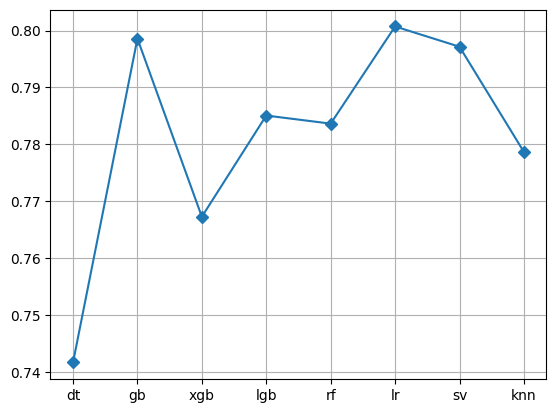

In [28]:
plt.plot(arr,acs,marker='D')
plt.grid()
plt.show()

In [29]:
df['TotalCharges'].isnull().any()

np.False_

In [30]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
import joblib
joblib.dump(gb,'model.pt')

['model.pt']

In [31]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [32]:
x_train.shape

(5616, 18)

In [37]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [40]:
y_pred=gb.predict(x_test)

In [41]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.62      0.50      0.55       352

    accuracy                           0.80      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405



In [49]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64